## 手动搜索超参数

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.14.5
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

I1021 16:20:22.500115 4437613888 california_housing.py:114] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /Users/barackbao/scikit_learn_data


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint
pprint.pprint(housing.data[:5])
pprint.pprint(housing.target[:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

# 默认划分比例为3:1
X_train_all, X_test, y_train_all, y_test = train_test_split(housing.data, housing.target,
                                                           random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all,
                                                     random_state=11)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [6]:
learning_rates = [1e-4, 3e-4, 1e-3, 3e-4, 1e-2]
histories = []

for lr in learning_rates:
    # 模型构建
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                          input_shape=X_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    opt = keras.optimizers.SGD(lr)
    model.compile(loss='mean_squared_error', optimizer=opt)
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
    log_his = model.fit(X_train_scaled, y_train,
                        validation_data=(X_valid_scaled, y_valid),
                        epochs=100,
                        callbacks=callbacks)
    histories.append(log_his)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 47us/sample - loss: 4.8943 - val_loss: 4.4427
Epoch 2/100
11610/11610 [==============================] - 0s 28us/sample - loss: 3.7141 - val_loss: 3.4567
Epoch 3/100
11610/11610 [==============================] - 0s 24us/sample - loss: 2.9437 - val_loss: 2.8002
Epoch 4/100
11610/11610 [==============================] - 0s 23us/sample - loss: 2.4122 - val_loss: 2.3360
Epoch 5/100
11610/11610 [==============================] - 0s 23us/sample - loss: 2.0287 - val_loss: 1.9966
Epoch 6/100
11610/11610 [==============================] - 0s 26us/sample - loss: 1.7447 - val_loss: 1.7434
Epoch 7/100
11610/11610 [==============================] - 0s 25us/sample - loss: 1.5317 - val_loss: 1.5511
Epoch 8/100
11610/11610 [==============================] - 0s 23us/sample - loss: 1.3683 - val_loss: 1.4023
Epoch 9/100
11610/11610 [==============================] - 0s 26us/sample - loss: 1.240

11610/11610 [==============================] - 0s 23us/sample - loss: 0.6711 - val_loss: 0.7173
Epoch 13/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6593 - val_loss: 0.7052
Epoch 14/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.6485 - val_loss: 0.6941
Epoch 15/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6384 - val_loss: 0.6838
Epoch 16/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.6292 - val_loss: 0.6743
Epoch 17/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6205 - val_loss: 0.6653
Epoch 18/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6123 - val_loss: 0.6567
Epoch 19/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.6048 - val_loss: 0.6493
Epoch 20/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5976 - val_loss: 0.6416
Epoch 21/100
11610/11610 [======

Epoch 31/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4525 - val_loss: 0.4788
Epoch 32/100
11610/11610 [==============================] - 0s 24us/sample - loss: 0.4506 - val_loss: 0.4772
Epoch 33/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4487 - val_loss: 0.4742
Epoch 34/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4470 - val_loss: 0.4722
Epoch 35/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4449 - val_loss: 0.4710
Epoch 36/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4434 - val_loss: 0.4677
Epoch 37/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4418 - val_loss: 0.4669
Epoch 38/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4399 - val_loss: 0.4637
Epoch 39/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4386 - val_loss: 0.4628
Epoch 40/100
11610/

11610/11610 [==============================] - 0s 26us/sample - loss: 0.3894 - val_loss: 0.4040
Epoch 11/100
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3868 - val_loss: 0.3971
Epoch 12/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3863 - val_loss: 0.3940
Epoch 13/100
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3794 - val_loss: 0.3975
Epoch 14/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3760 - val_loss: 0.3882
Epoch 15/100
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3734 - val_loss: 0.3908
Epoch 16/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3739 - val_loss: 0.3826
Epoch 17/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3691 - val_loss: 0.3831
Epoch 18/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3670 - val_loss: 0.3829
Epoch 19/100
11610/11610 [======

learning_rate: 0.0001


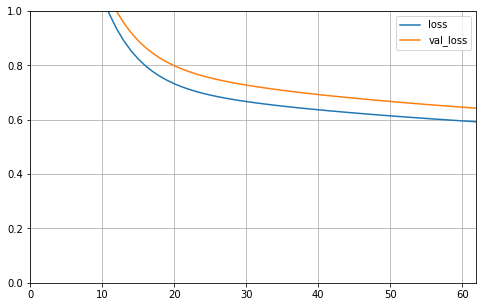

learning_rate: 0.0003


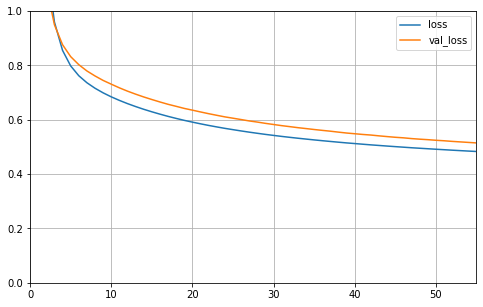

learning_rate: 0.001


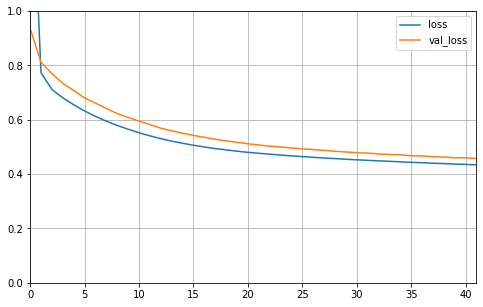

learning_rate: 0.0003


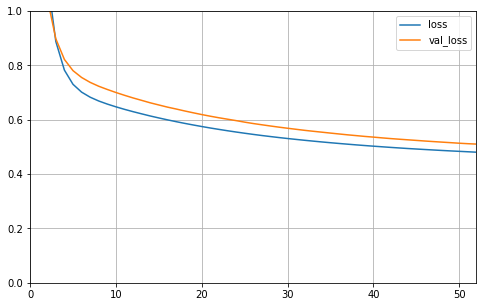

learning_rate: 0.01


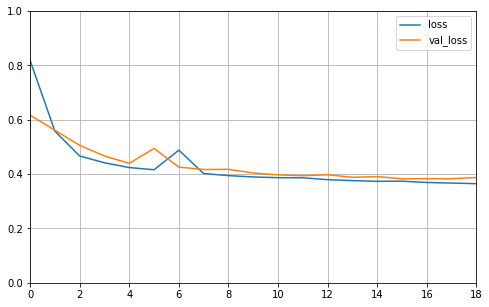

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
for lr, history in zip(learning_rates, histories):
    print('learning_rate: {}'.format(lr))
    plot_learning_curves(history)